# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

261

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities=cities[0:100] #Sample

City=[]
Cloudiness=[]
Country=[]
Date=[]
Humidity=[]
Lat=[]
Lng=[]
Max_Temp=[]
Wind_Speed=[]

i=0

print("Beginning Data Retrieval")
print("-----------------------------")


for city in cities:
    # Build query URL
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
        
    try:

        cld=weather_json["clouds"]["all"]
        ct=weather_json["sys"]["country"]
        wt=weather_json["dt"]
        hm=weather_json["main"]["humidity"]
        lt=weather_json["coord"]["lat"]
        lg=weather_json["coord"]["lon"]
        mx=weather_json["coord"]["lon"]
        mn=weather_json["main"]["temp_min"]
   
    except KeyError:
        print("Oops!  That was no valid number.  Try again...")
        
    i=i+1
    City.append(city)
    Cloudiness.append(cld)
    Country.append(ct)
    Date.append(wt)
    Humidity.append(hm)
    Lat.append(lt)
    Lng.append(lg)
    Max_Temp.append(mx)
    Wind_Speed.append(mn)
    print(f"Processing Record {i} of Set 1 | {city}")
    
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | cayenne
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | tashtagol
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | praia da vitoria
Processing Record 11 of Set 1 | busselton
Oops!  That was no valid number.  Try again...
Processing Record 12 of Set 1 | tsihombe
Processing Record 13 of Set 1 | faanui
Oops!  That was no valid number.  Try again...
Processing Record 14 of Set 1 | mrirt
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | marawi
Processing Record 17 of Set 1 | atuona
Oops!  That was no valid number.  Try again...
Processing Record 18 of Set 1 | grand river south east
Processing Record 19 of Set 1 | whyalla
Processing Record 20 of Set 1 | r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df=pd.DataFrame({"City":City, "Cloudiness":Cloudiness,"Country":Country, "Date":Date,
                 "Humidity":Humidity,"Lat":Lat,"Lng":Lng,"Max Temp":Max_Temp,"Wind_Speed":Wind_Speed})
df.count()

City          100
Cloudiness    100
Country       100
Date          100
Humidity      100
Lat           100
Lng           100
Max Temp      100
Wind_Speed    100
dtype: int64

In [5]:
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,port blair,39,IN,1570060078,68,11.67,92.75,92.75,300.856
1,cayenne,0,GF,1570059887,78,4.94,-52.33,-52.33,301.150
2,hithadhoo,89,MV,1570060149,81,-0.60,73.08,73.08,300.806
3,kapaa,75,US,1570060068,74,22.08,-159.32,-159.32,300.370
4,hilo,90,US,1570060087,69,19.71,-155.08,-155.08,294.260
5,lompoc,1,US,1570060169,43,34.64,-120.46,-120.46,294.820
6,tashtagol,0,RU,1570060623,67,52.76,87.85,87.85,271.706
7,ushuaia,40,AR,1570060073,70,-54.81,-68.31,-68.31,279.150
8,dingle,57,PH,1570060129,80,11.00,122.67,122.67,299.666
9,praia da vitoria,75,PT,1570060624,82,38.73,-27.07,-27.07,293.150


In [6]:
df.to_csv("output.csv", index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

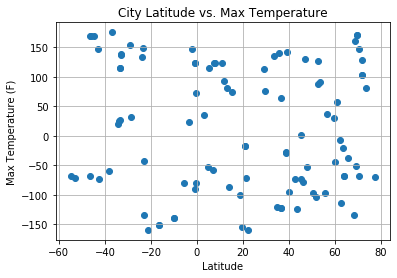

In [7]:
plt.scatter(Lat,Max_Temp)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

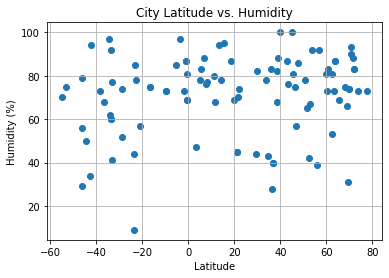

In [8]:
plt.scatter(Lat,Humidity)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

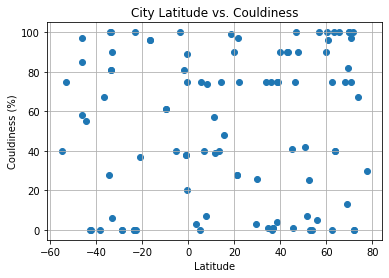

In [9]:
plt.scatter(Lat,Cloudiness)
plt.title("City Latitude vs. Couldiness")
plt.xlabel("Latitude")
plt.ylabel("Couldiness (%)")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

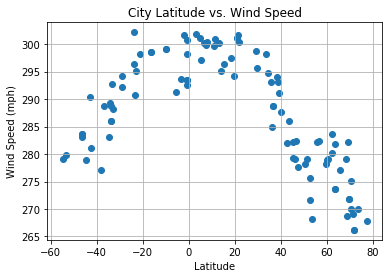

In [10]:
plt.scatter(Lat,Wind_Speed)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots


In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere=df[df["Lat"]>0]
Southern_Hemisphere=df[df["Lat"]<0]

In [13]:
Northern_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
0,port blair,39,IN,1570060078,68,11.67,92.75,92.75,300.856
1,cayenne,0,GF,1570059887,78,4.94,-52.33,-52.33,301.150
3,kapaa,75,US,1570060068,74,22.08,-159.32,-159.32,300.370
4,hilo,90,US,1570060087,69,19.71,-155.08,-155.08,294.260
5,lompoc,1,US,1570060169,43,34.64,-120.46,-120.46,294.820


In [14]:
Southern_Hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind_Speed
2,hithadhoo,89,MV,1570060149,81,-0.60,73.08,73.08,300.806
7,ushuaia,40,AR,1570060073,70,-54.81,-68.31,-68.31,279.150
10,busselton,81,AU,1570060072,60,-33.64,115.35,115.35,285.930
11,tsihombe,81,AU,1570060072,60,-33.64,115.35,115.35,285.930
12,faanui,96,PF,1570060180,75,-16.48,-151.75,-151.75,298.566


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

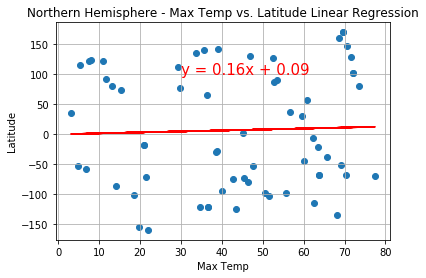

The r-squared is: 0.035566818007335334
The p-value is: 0.7802334128741613


In [25]:
y_values = Northern_Hemisphere["Max Temp"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,100),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

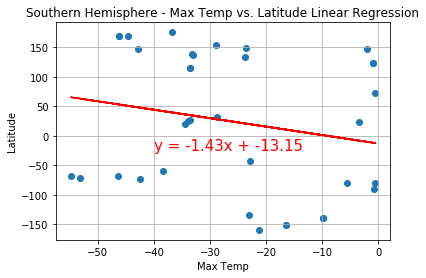

The r-squared is: -0.2049499297852887
The p-value is: 0.2304965792806169


In [26]:
y_values = Southern_Hemisphere["Max Temp"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,-25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

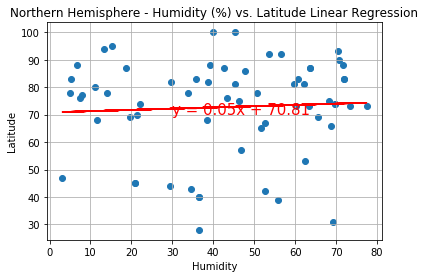

The r-squared is: 0.056551100692104075
The p-value is: 0.6571527153900293


In [27]:
y_values = Northern_Hemisphere["Humidity"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,70),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

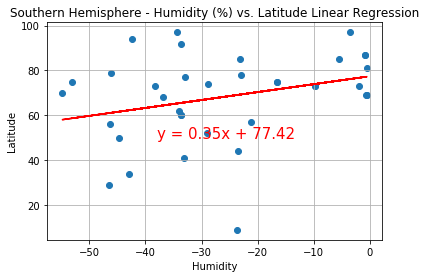

The r-squared is: 0.30183640360460523
The p-value is: 0.07359977474069665


In [28]:
y_values = Southern_Hemisphere["Humidity"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-38,50),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

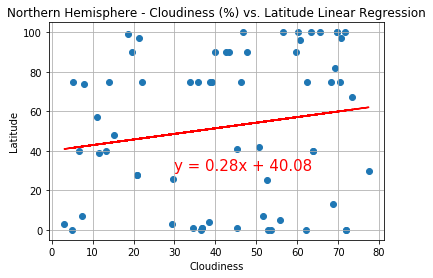

The r-squared is: 0.1635873895316432
The p-value is: 0.19648647403291084


In [29]:
y_values = Northern_Hemisphere["Cloudiness"]
x_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

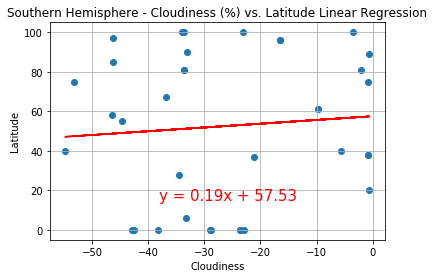

The r-squared is: 0.08492947875133865
The p-value is: 0.6223769326189952


In [30]:
y_values = Southern_Hemisphere["Cloudiness"]
x_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-38,15),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

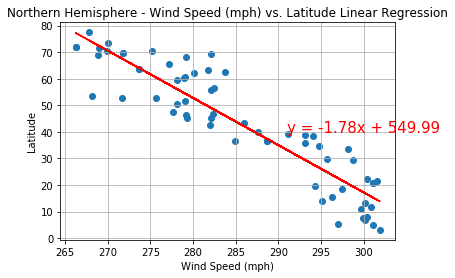

The r-squared is: -0.9209096371605162
The p-value is: 4.66782059462717e-27


In [31]:
x_values = Northern_Hemisphere["Wind_Speed"]
y_values = Northern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(291,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

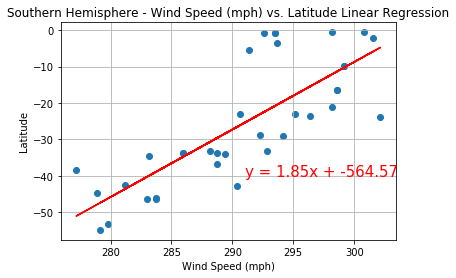

The r-squared is: 0.7854130150573343
The p-value is: 1.4044759989876481e-08


In [32]:
x_values = Southern_Hemisphere["Wind_Speed"]
y_values = Southern_Hemisphere["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(291,-40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")
print(f"The p-value is: {pvalue}")